## Similarity comparison using word2vec

The model word2vec is based on the principle that words appearing in similar contexts tend to have similar meanings. It captures semantic relationships between words based on their context (within a specific window) within a corpus, and represents words as dense vectors in a continuous vector space. 

Gensim provides an efficient implementation of Word2Vec.

In [1]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


I use the model 'word2vec-google-news-300.kv' here. This pretrained model maps each word to a 300-dimensional vector. It was trained on Google News dataset, ≈ 100 billion words. The vocabulary contains about 3 million words and phrases. 

It's a skip-gram Word2Vec model, without including a neural network anymore, it only contains the learned vectors. What I have loaded here from Gensim is only the embeddings, not the training weights.

In [2]:
wv.save("word2vec-google-news-300.kv")

In [1]:
from gensim.models import KeyedVectors
wv_new = KeyedVectors.load("word2vec-google-news-300.kv", mmap='r')

In [2]:
wv_new.similarity('car', 'vehicle')

np.float32(0.7821097)

Word2Vec is case-sensitive

In [3]:
wv_new.similarity('car', 'Car')

np.float32(0.6677609)

In [4]:
wv_new.most_similar("banana")

[('bananas', 0.7523775696754456),
 ('pineapple', 0.6587537527084351),
 ('mango', 0.6365211009979248),
 ('pineapples', 0.6313878297805786),
 ('papaya', 0.6063665747642517),
 ('coconut', 0.6035483479499817),
 ('potato', 0.5747568607330322),
 ('melon', 0.5625775456428528),
 ('cashew', 0.562165379524231),
 ('tomato', 0.5590206384658813)]

In [6]:
wv_new.most_similar(positive=["king", "woman"], negative=["man"])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411403656006)]

It contains mostly English words.

In [7]:
"krankenhaus" in wv_new

False

In [8]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import numpy as np

# Example sentences
sentence1 = "The cat is sitting on the mat."
sentence2 = "The dog is lying on the rug."

# Tokenize sentences
tokens1 = word_tokenize(sentence1.lower())
tokens2 = word_tokenize(sentence2.lower())

# Remove stop words and punctuation
stop_words = set(stopwords.words('english'))
tokens1 = [word for word in tokens1 if word not in stop_words and word not in string.punctuation]
tokens2 = [word for word in tokens2 if word not in stop_words and word not in string.punctuation]

# Calculate word vectors
word_vectors1 = [wv_new[word] for word in tokens1]
word_vectors2 = [wv_new[word] for word in tokens2]

# Average word vectors
sentence_vector1 = np.mean(word_vectors1, axis=0)
sentence_vector2 = np.mean(word_vectors2, axis=0)

# Calculate cosine similarity
similarity = np.dot(sentence_vector1, sentence_vector2) / (np.linalg.norm(sentence_vector1) * np.linalg.norm(sentence_vector2))
similarity

np.float32(0.637738)

Visualization after PCA

In [9]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

def reduce_dimensions(model, n_components, top_n):
    vectors = np.asarray(model.vectors[:top_n])
    labels = np.asarray(model.index_to_key[:top_n])

    # First reduce to something manageable (e.g., 50)
    pca = PCA(n_components=50)
    vectors_pca = pca.fit_transform(vectors)

    # THEN t-SNE
    tsne = TSNE(n_components=n_components, random_state=0, perplexity=30)
    vectors_tsne = tsne.fit_transform(vectors_pca)

    x_vals = vectors_tsne[:, 0]
    y_vals = vectors_tsne[:, 1]
    return x_vals, y_vals, labels

x_vals, y_vals, labels = reduce_dimensions(wv_new, 2, 10000)

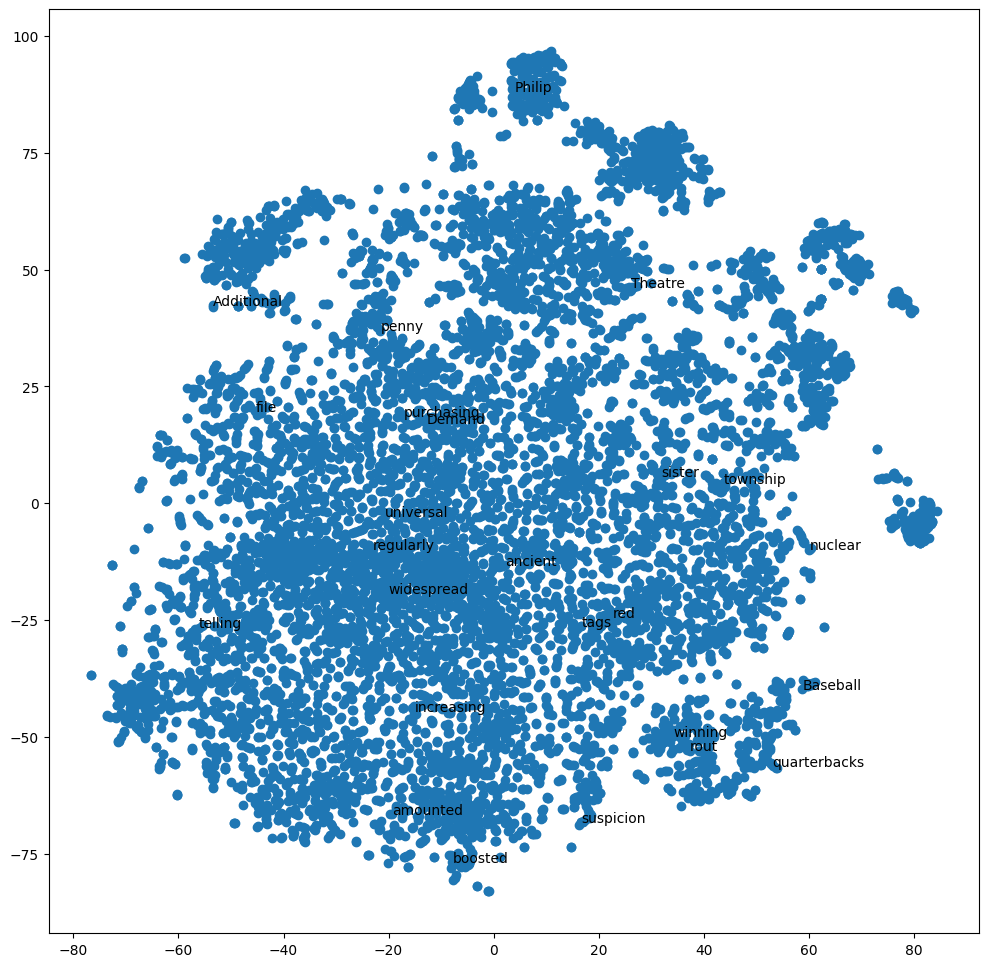

In [10]:
import matplotlib.pyplot as plt
import random

random.seed(0)

plt.figure(figsize=(12, 12))
plt.scatter(x_vals, y_vals)

indices = list(range(len(labels)))
selected_indices = random.sample(indices, 25)
for i in selected_indices:
    plt.annotate(labels[i], (x_vals[i], y_vals[i]))